In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataframe-pokemon.csv')

In [3]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
df.set_index('Name', inplace=True)

In [5]:
df.drop(['#'], inplace=True, axis=1)

In [6]:
df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [7]:
type_2 = df['Type 2'].value_counts(ascending=False)

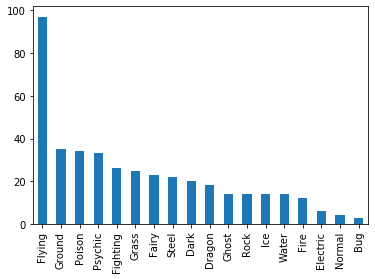

In [8]:
type_2.plot(kind='bar')

In [9]:
plt.show()

In [10]:
type_1 = df.groupby(['Type 1'])[['Attack']].mean()

In [11]:
print(type_1)

              Attack
Type 1              
Bug        70.971014
Dark       88.387097
Dragon    112.125000
Electric   69.090909
Fairy      61.529412
Fighting   96.777778
Fire       84.769231
Flying     78.750000
Ghost      73.781250
Grass      73.214286
Ground     95.750000
Ice        72.750000
Normal     73.469388
Poison     74.678571
Psychic    71.456140
Rock       92.863636
Steel      92.703704
Water      74.151786


In [12]:
type_2 = df.groupby(['Type 2'])[['Attack']].mean()

In [13]:
type_1.reset_index(inplace=True)
type_2.reset_index(inplace=True)

In [14]:
merged = pd.merge(type_1,type_2, left_on='Type 1', right_on='Type 2')
print(merged)

      Type 1    Attack_x    Type 2    Attack_y
0        Bug   70.971014       Bug   90.000000
1       Dark   88.387097      Dark  109.800000
2     Dragon  112.125000    Dragon   94.444444
3   Electric   69.090909  Electric   72.666667
4      Fairy   61.529412     Fairy   61.608696
5   Fighting   96.777778  Fighting  112.846154
6       Fire   84.769231      Fire   81.250000
7     Flying   78.750000    Flying   80.288660
8      Ghost   73.781250     Ghost   84.142857
9      Grass   73.214286     Grass   74.160000
10    Ground   95.750000    Ground   89.857143
11       Ice   72.750000       Ice   98.000000
12    Normal   73.469388    Normal   52.750000
13    Poison   74.678571    Poison   67.588235
14   Psychic   71.456140   Psychic   74.696970
15      Rock   92.863636      Rock   84.000000
16     Steel   92.703704     Steel   92.590909
17     Water   74.151786     Water   70.142857


In [15]:
merged.drop(['Type 1'], inplace=True, axis=1)

In [16]:
merged.rename(columns={'Type 2':'Type'}, inplace=True)

In [17]:
merged

,Attack_x,Type,Attack_y
0,70.971014,Bug,90.000000
1,88.387097,Dark,109.800000
2,112.125000,Dragon,94.444444
3,69.090909,Electric,72.666667
4,61.529412,Fairy,61.608696
5,96.777778,Fighting,112.846154
6,84.769231,Fire,81.250000
7,78.750000,Flying,80.288660
8,73.781250,Ghost,84.142857
9,73.214286,Grass,74.160000


In [18]:
plt.figure(figsize=(14,8))

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

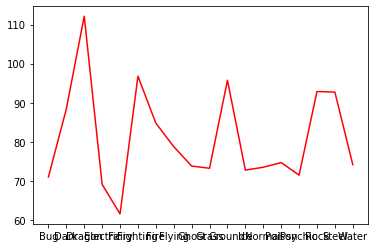

In [19]:
plt.plot(merged['Type'],merged['Attack_x'],color='red')

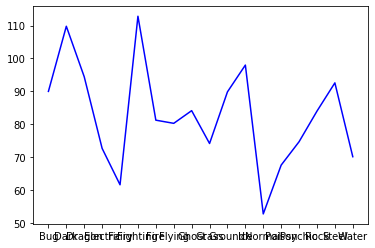

In [20]:
plt.plot(merged['Type'],merged['Attack_y'],color='blue')

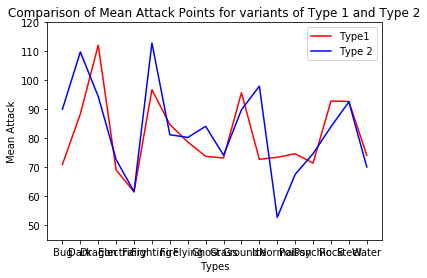

In [23]:
plt.plot(merged['Type'],merged['Attack_x'],color='red')
plt.plot(merged['Type'],merged['Attack_y'],color='blue')
plt.xlabel('Types')
plt.ylabel('Mean Attack')
plt.ylim((45, 120))
plt.title('Comparison of Mean Attack Points for variants of Type 1 and Type 2')
plt.legend(labels=['Type1', 'Type 2'])
plt.show()

In [24]:
res = df.groupby(['Generation','Legendary']).size().unstack()

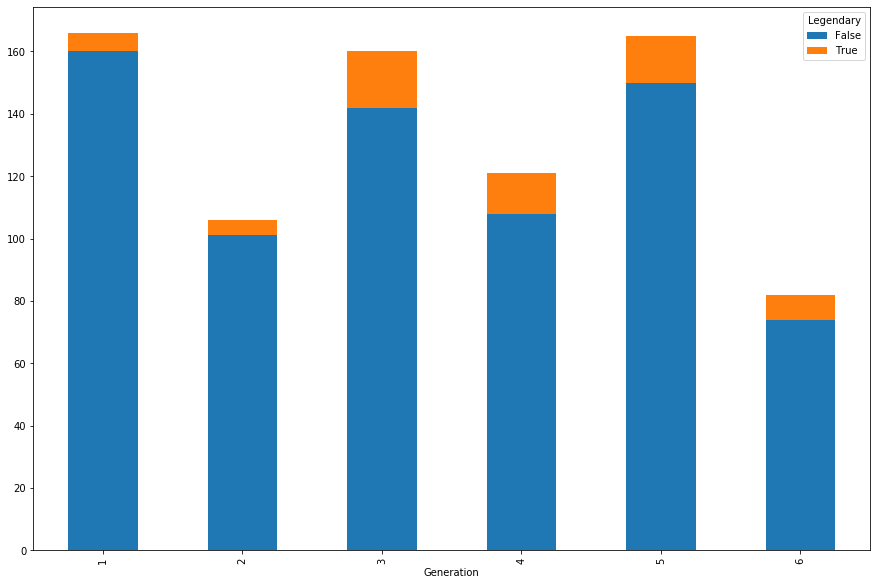

In [25]:
res.plot(kind='bar', stacked=True, figsize=(15,10))
plt.show()

In [26]:
mean_attack = np.mean(df['Attack'])

In [27]:
dragon = df[df['Type 1']=='Dragon']

In [29]:
mean_dragon = np.mean(dragon['Attack'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026E46DD4FC8>]],
      dtype=object)

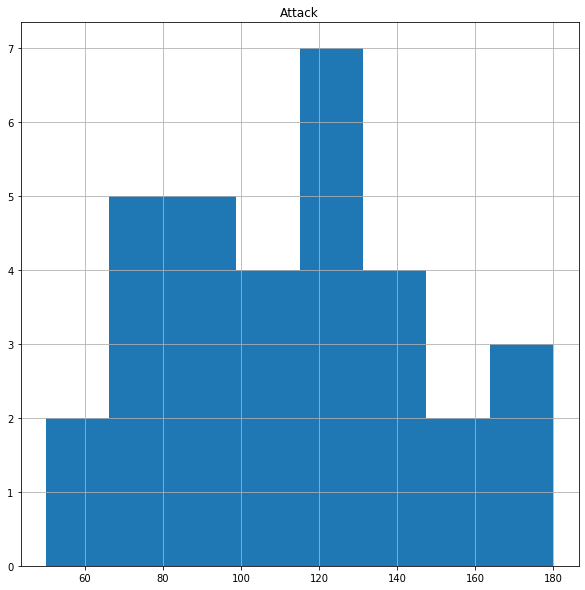

In [31]:
dragon.hist(column="Attack",bins=8, figsize=(10,10))

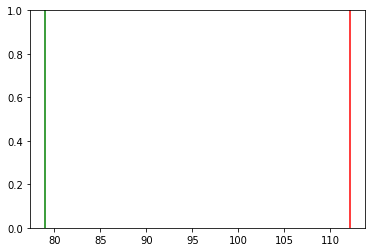

In [35]:
plt.axvline(x=mean_attack,color='green')
plt.axvline(x=mean_dragon,color='red')

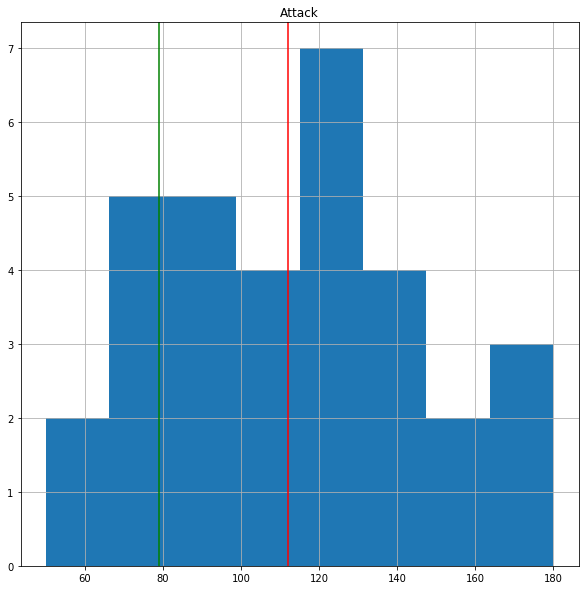

In [36]:
dragon.hist(column="Attack",bins=8, figsize=(10,10))
plt.axvline(x=mean_attack,color='green')
plt.axvline(x=mean_dragon,color='red')
plt.show()

In [37]:
electric = [df['Type 1']=='Electric']

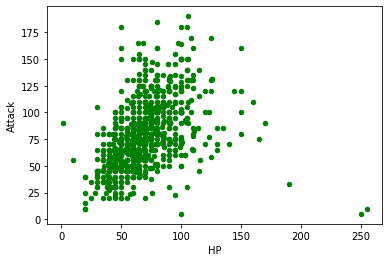

In [41]:
df.plot.scatter(x='HP',y='Attack', color='green')

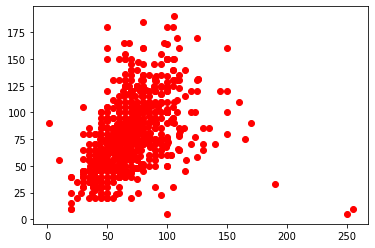

In [42]:
plt.scatter(df['HP'],df['Attack'],color='red')

Text(0.5, 1.0, 'stacked bar chart with counts')

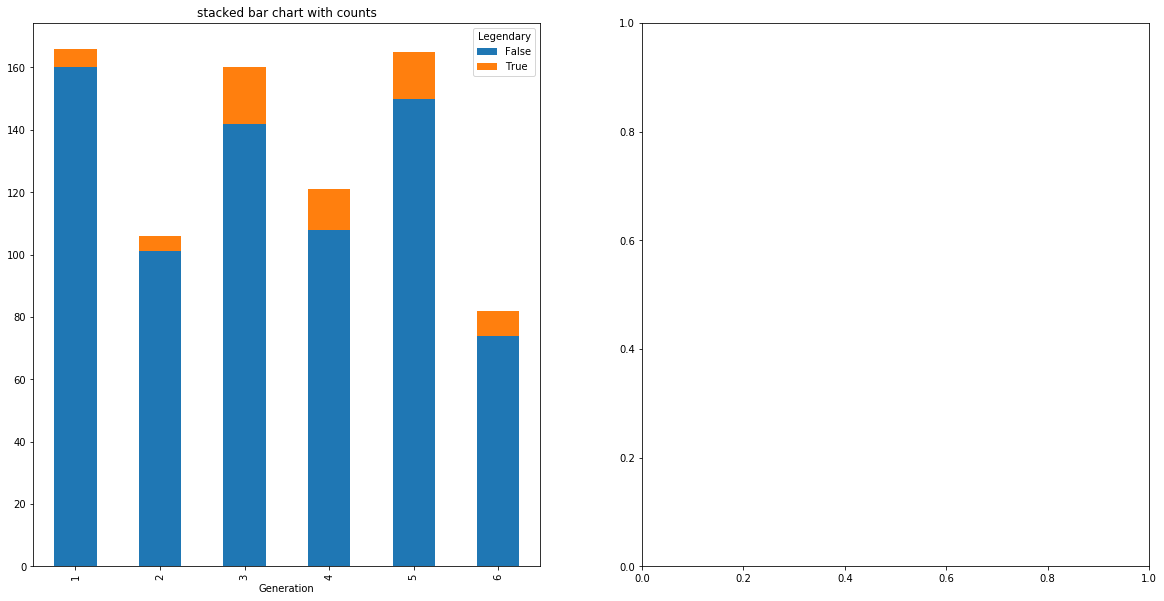

In [46]:
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(20,10))
res_1 = df.groupby(['Generation','Legendary']).size().unstack()
res_1.plot(kind='bar', stacked=True, ax=ax_1)
ax_1.set_title('stacked bar chart with counts')

In [47]:
new_res = res_1.fillna(0)

In [48]:
new_res['Total'] = new_res[True] + new_res[False]
new_res[True] = (new_res[True] / new_res['Total']) * 100
new_res[False] = (new_res[False] / new_res['Total']) * 100
new_res.drop('Total', inplace=True, axis=1)

In [50]:
new_res.plot(kind='bar', stacked=True, ax=ax_2)
ax_2.set_title('Stacked bar-chart with percentages')

Text(0.5, 1, 'Stacked bar-chart with percentages')

Text(0.5, 1.0, 'Stacked bar-chart with percentages')

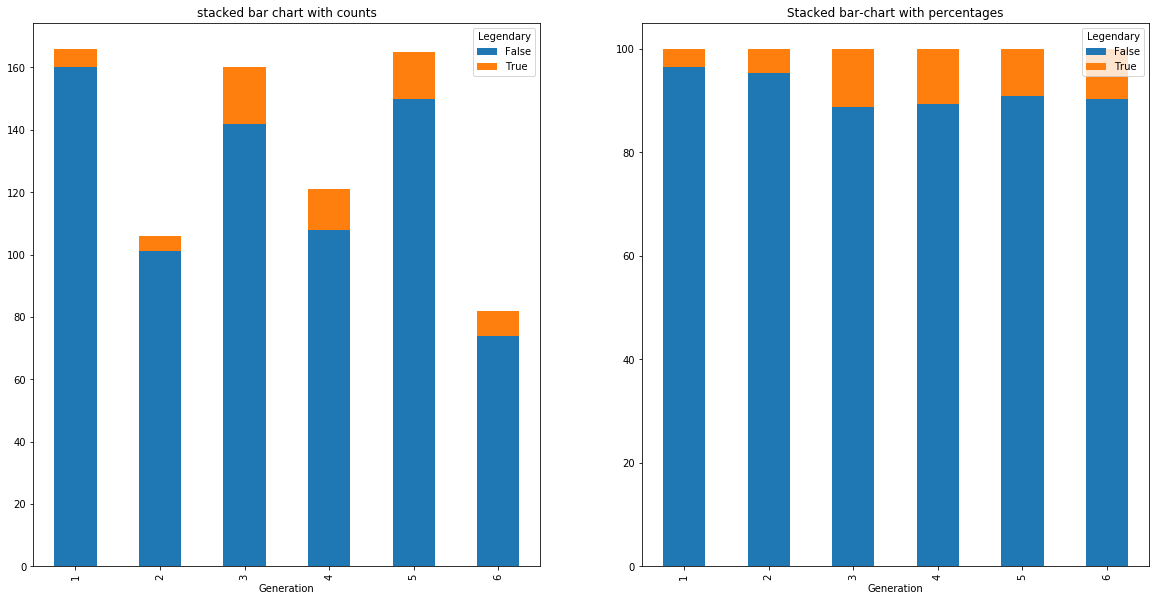

In [51]:
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(20,10))
res_1 = df.groupby(['Generation','Legendary']).size().unstack()
res_1.plot(kind='bar', stacked=True, ax=ax_1)
ax_1.set_title('stacked bar chart with counts')

new_res = res_1.fillna(0)

new_res['Total'] = new_res[True] + new_res[False]
new_res[True] = (new_res[True] / new_res['Total']) * 100
new_res[False] = (new_res[False] / new_res['Total']) * 100
new_res.drop('Total', inplace=True, axis=1)

new_res.plot(kind='bar', stacked=True, ax=ax_2)
ax_2.set_title('Stacked bar-chart with percentages')